## Python statistics essential training - 04_07_solution

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
#GOAL: bootstrap on greens grades to find conf interval of passing grade (5 or higher) 
# import and view grades
pop = pd.read_csv('grades.csv')
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


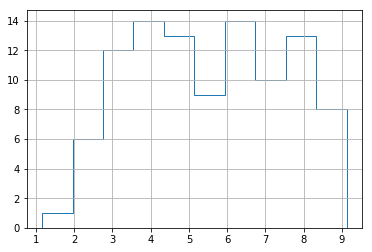

In [5]:
#create hist of grades, appears binomial
pop.grade.hist(histtype='step')

In [6]:
#find the percentage of failing grade (below 5)
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [7]:
# bootstrap sample and repeat 1000 times
bootstrap = pd.DataFrame({'passing': [scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

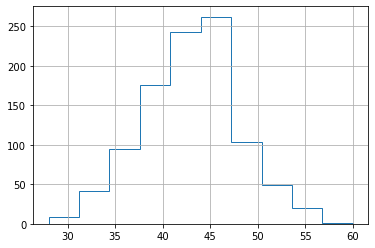

In [8]:
# hist of bootstap dist
bootstrap.passing.hist(histtype='step')

In [9]:
# look at quantiles 2.5% and 97.5%, giving the 95% confidence interval
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(33.0, 53.0)